In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_train
import utils_annotate
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER


In [24]:
file_list = os.listdir('individual_ner/')
print(len(file_list))
# file_list

57


In [29]:
record = file_list[-1]
print(record)
file = f'individual_ner/{record}'
data = utils_annotate.load_json(file)

10.1016j.molliq.2023.122606.json


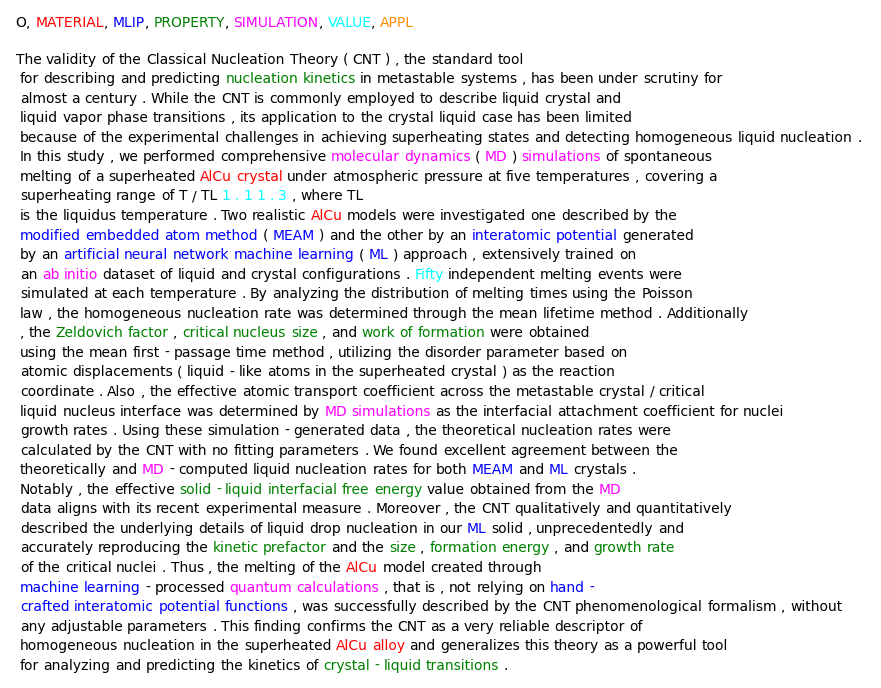

In [30]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in data['words']]
markers = [{"color": colors[i]} for i in data['ner']]
j = 0
for i in range(len(data['words'])):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [28]:
new_rec, new_rec4check = utils_annotate.revise(file,
 [107, 108, 109], 'O', overwrite=True)

In [27]:
rec = utils_annotate.check(file)
rec

[(0, 'The', 'O'),
 (1, 'validity', 'O'),
 (2, 'of', 'O'),
 (3, 'the', 'O'),
 (4, 'Classical', 'O'),
 (5, 'Nucleation', 'O'),
 (6, 'Theory', 'O'),
 (7, '(', 'O'),
 (8, 'CNT', 'O'),
 (9, ')', 'O'),
 (10, ',', 'O'),
 (11, 'the', 'O'),
 (12, 'standard', 'O'),
 (13, 'tool', 'O'),
 (14, 'for', 'O'),
 (15, 'describing', 'O'),
 (16, 'and', 'O'),
 (17, 'predicting', 'O'),
 (18, 'nucleation', 'PROPERTY'),
 (19, 'kinetics', 'PROPERTY'),
 (20, 'in', 'O'),
 (21, 'metastable', 'O'),
 (22, 'systems', 'O'),
 (23, ',', 'O'),
 (24, 'has', 'O'),
 (25, 'been', 'O'),
 (26, 'under', 'O'),
 (27, 'scrutiny', 'O'),
 (28, 'for', 'O'),
 (29, 'almost', 'O'),
 (30, 'a', 'O'),
 (31, 'century', 'O'),
 (32, '.', 'O'),
 (33, 'While', 'O'),
 (34, 'the', 'O'),
 (35, 'CNT', 'O'),
 (36, 'is', 'O'),
 (37, 'commonly', 'O'),
 (38, 'employed', 'O'),
 (39, 'to', 'O'),
 (40, 'describe', 'O'),
 (41, 'liquid', 'O'),
 (42, 'crystal', 'O'),
 (43, 'and', 'O'),
 (44, 'liquid', 'O'),
 (45, 'vapor', 'O'),
 (46, 'phase', 'O'),
 (47, 'tr

In [ ]:
word_list, categories = utils_annotate.reannotate(file, ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION'])